In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df= pd.read_excel('Police Department Incident Reports.xlsx')
df.head()

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Resolution,Police District,Supervisor District,Latitude,Longitude,Neighborhoods
0,2018-01-01,00:00:00,2018,Monday,Larceny Theft,Open or Active,Mission,10.0,37.756167,-122.406636,53.0
1,2018-01-01,00:00:00,2018,Monday,Fraud,Open or Active,Southern,6.0,37.773467,-122.391434,34.0
2,2018-01-01,12:00:00,2018,Monday,Fraud,Open or Active,Tenderloin,5.0,37.781136,-122.412025,20.0
3,2018-01-01,12:00:00,2018,Monday,Fraud,Open or Active,Northern,3.0,37.792175,-122.422691,105.0
4,2018-01-01,08:00:00,2018,Monday,Fraud,Open or Active,Richmond,1.0,37.775238,-122.458435,12.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961577 entries, 0 to 961576
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Incident Date         961577 non-null  datetime64[ns]
 1   Incident Time         961577 non-null  object        
 2   Incident Year         961577 non-null  int64         
 3   Incident Day of Week  961577 non-null  object        
 4   Incident Category     960388 non-null  object        
 5   Resolution            961577 non-null  object        
 6   Police District       961577 non-null  object        
 7   Supervisor District   908781 non-null  float64       
 8   Latitude              909249 non-null  float64       
 9   Longitude             909249 non-null  float64       
 10  Neighborhoods         897966 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 80.7+ MB


In [5]:
df= df.dropna()
df

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Resolution,Police District,Supervisor District,Latitude,Longitude,Neighborhoods
0,2018-01-01,00:00:00,2018,Monday,Larceny Theft,Open or Active,Mission,10.0,37.756167,-122.406636,53.0
1,2018-01-01,00:00:00,2018,Monday,Fraud,Open or Active,Southern,6.0,37.773467,-122.391434,34.0
2,2018-01-01,12:00:00,2018,Monday,Fraud,Open or Active,Tenderloin,5.0,37.781136,-122.412025,20.0
3,2018-01-01,12:00:00,2018,Monday,Fraud,Open or Active,Northern,3.0,37.792175,-122.422691,105.0
4,2018-01-01,08:00:00,2018,Monday,Fraud,Open or Active,Richmond,1.0,37.775238,-122.458435,12.0
...,...,...,...,...,...,...,...,...,...,...,...
961572,2025-06-02,10:20:00,2025,Monday,Drug Offense,Cite or Arrest Adult,Taraval,11.0,37.723457,-122.454117,71.0
961573,2025-06-02,13:24:00,2025,Monday,Drug Offense,Cite or Arrest Adult,Tenderloin,5.0,37.785725,-122.416328,20.0
961574,2025-06-02,19:46:00,2025,Monday,Drug Offense,Cite or Arrest Adult,Tenderloin,5.0,37.783722,-122.414238,20.0
961575,2025-06-02,20:00:00,2025,Monday,Disorderly Conduct,Open or Active,Mission,9.0,37.749435,-122.411591,53.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896633 entries, 0 to 961576
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Incident Date         896633 non-null  datetime64[ns]
 1   Incident Time         896633 non-null  object        
 2   Incident Year         896633 non-null  int64         
 3   Incident Day of Week  896633 non-null  object        
 4   Incident Category     896633 non-null  object        
 5   Resolution            896633 non-null  object        
 6   Police District       896633 non-null  object        
 7   Supervisor District   896633 non-null  float64       
 8   Latitude              896633 non-null  float64       
 9   Longitude             896633 non-null  float64       
 10  Neighborhoods         896633 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 82.1+ MB


In [7]:
df['Incident Day of Week'].value_counts()

Incident Day of Week
Friday       137195
Wednesday    134152
Thursday     128982
Tuesday      127184
Monday       126735
Saturday     125020
Sunday       117365
Name: count, dtype: int64

In [ ]:
df['Incident Category'].value_counts()

Incident Category
Larceny Theft                                   251573
Other Miscellaneous                              64537
Malicious Mischief                               61232
Assault                                          59512
Non-Criminal                                     54021
Burglary                                         52062
Motor Vehicle Theft                              51128
Fraud                                            29884
Warrant                                          28971
Recovered Vehicle                                26735
Drug Offense                                     26312
Lost Property                                    22367
Robbery                                          20990
Missing Person                                   20730
Suspicious Occ                                   19677
Disorderly Conduct                               17058
Offences Against The Family And Children         12825
Miscellaneous Investigation                    

In [ ]:
df['Resolution'].value_counts()

Resolution
Open or Active          705537
Cite or Arrest Adult    183884
Unfounded                 4571
Exceptional Adult         2641
Name: count, dtype: int64

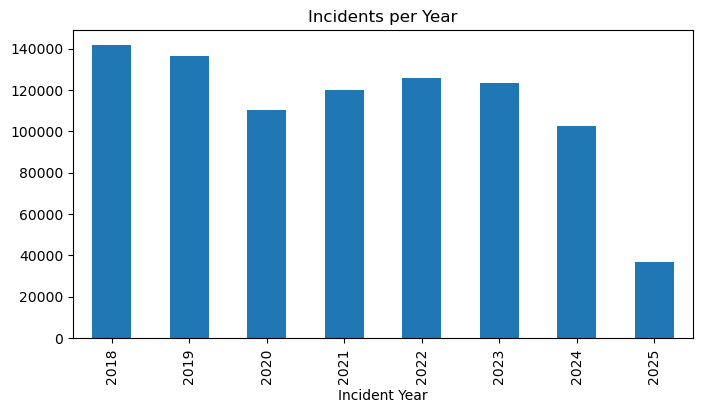

In [ ]:
# --- Temporal Analysis ---
# Crimes per year
crimes_per_year = df.groupby("Incident Year").size()
crimes_per_year.plot(kind="bar", figsize=(8,4), title="Incidents per Year")
plt.show()

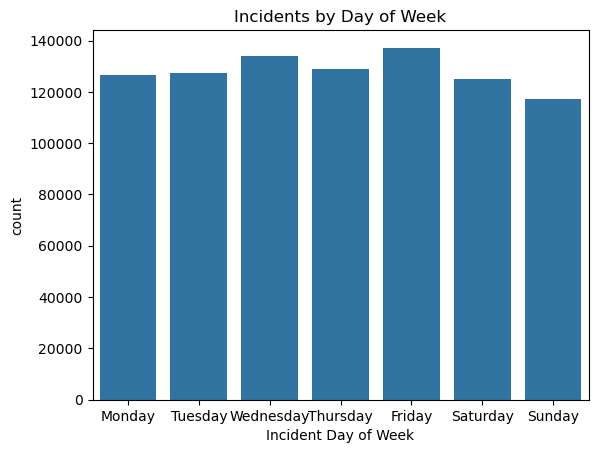

In [ ]:
# Crimes per day of week
sns.countplot(x="Incident Day of Week", data=df, order=[
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Incidents by Day of Week")
plt.show()

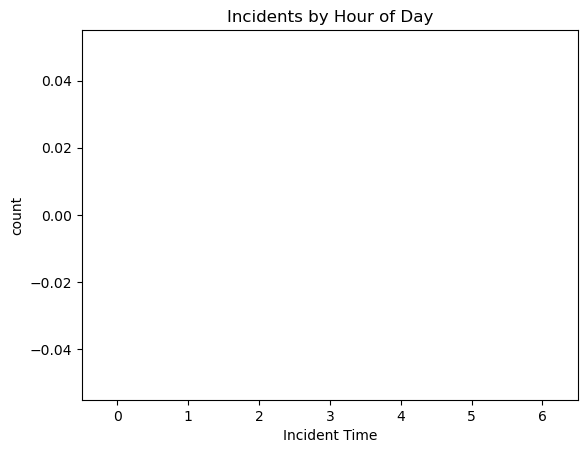

In [ ]:
# Crimes by hour
df['Incident Time'] = pd.to_datetime(df['Incident Time'], errors='coerce').dt.hour
sns.countplot(x="Incident Time", data=df)
plt.title("Incidents by Hour of Day")
plt.show()

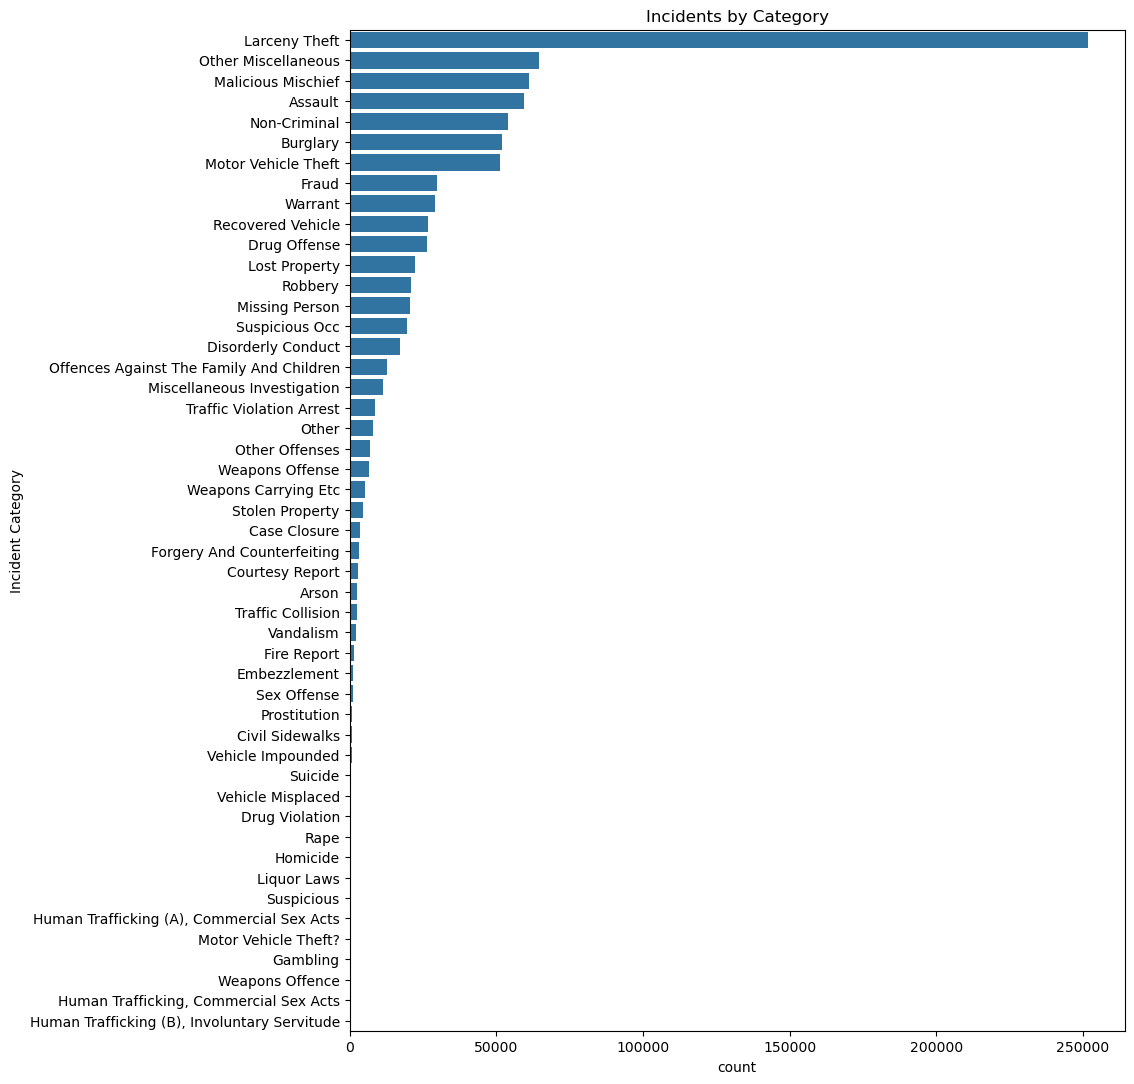

In [ ]:
# --- Category Analysis ---
plt.figure(figsize=(10,13))
sns.countplot(y="Incident Category", data=df, order=df['Incident Category'].value_counts().index)
plt.title("Incidents by Category")
plt.show()


In [ ]:
# --- Resolution Analysis ---
resolution_rate = df.groupby("Incident Category")['Resolution'].value_counts(normalize=True).unstack().fillna(0)
print(resolution_rate)


Resolution                                    Cite or Arrest Adult  \
Incident Category                                                    
Arson                                                     0.207687   
Assault                                                   0.276650   
Burglary                                                  0.116861   
Case Closure                                              0.555616   
Civil Sidewalks                                           0.716981   
Courtesy Report                                           0.032594   
Disorderly Conduct                                        0.328761   
Drug Offense                                              0.932198   
Drug Violation                                            0.976667   
Embezzlement                                              0.100174   
Fire Report                                               0.018881   
Forgery And Counterfeiting                                0.199034   
Fraud               

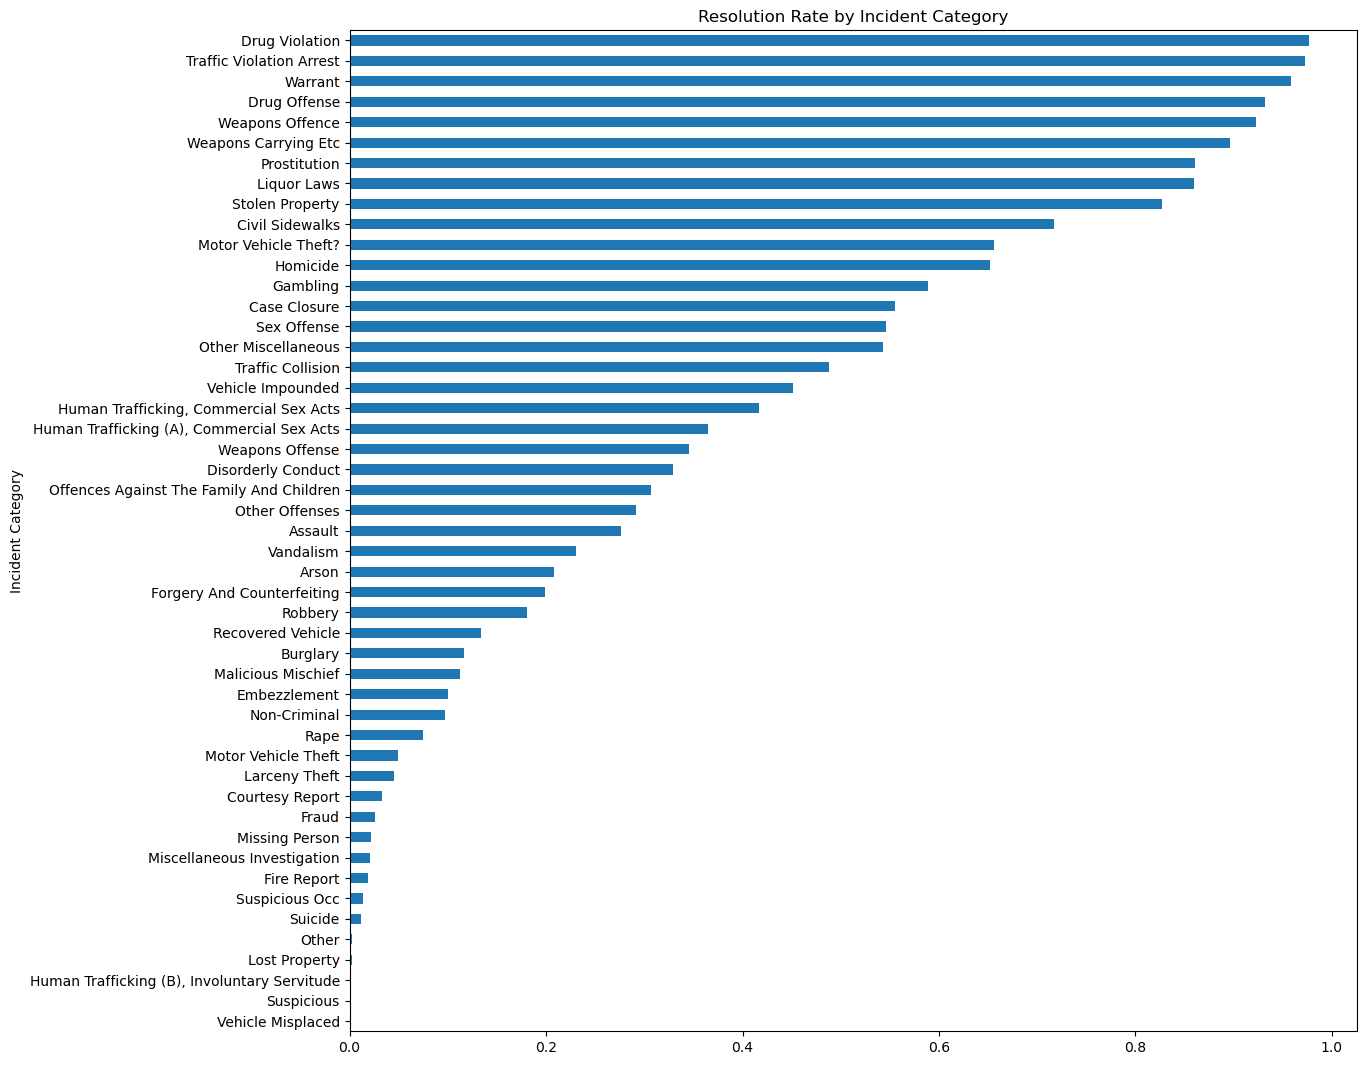

In [ ]:
# Plot clearance rates
resolution_rate['Cite or Arrest Adult'].sort_values().plot(kind="barh", figsize=(13,13))
plt.title("Resolution Rate by Incident Category")
plt.show()

c:\Users\HASTECH\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


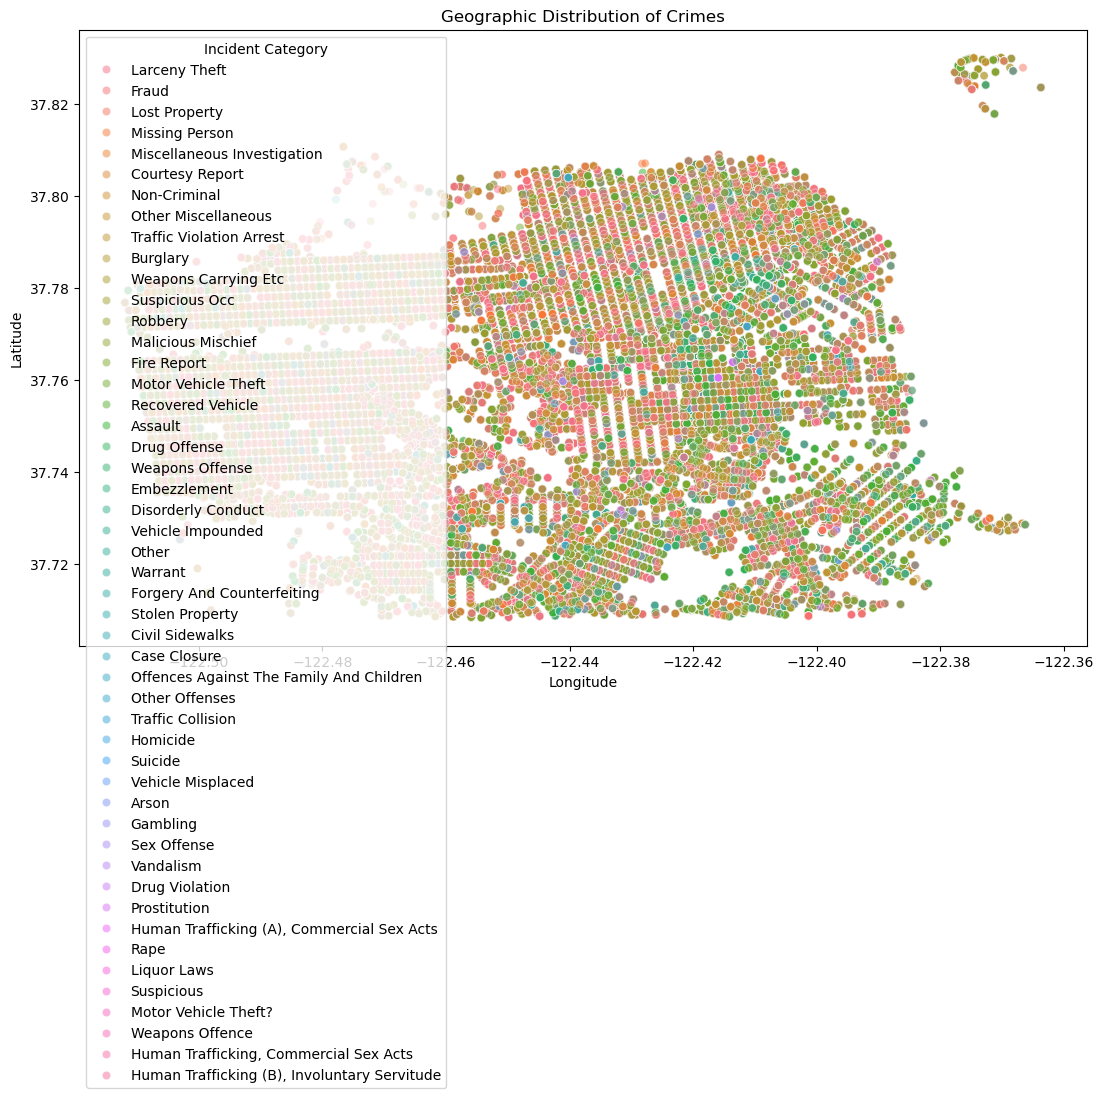

In [ ]:
# --- Geographic Analysis ---
plt.figure(figsize=(13,8))
sns.scatterplot(x="Longitude", y="Latitude", hue="Incident Category", data=df, alpha=0.5)
plt.title("Geographic Distribution of Crimes")
plt.show()


In [ ]:
# --- Statistics ---
# Top 5 districts with most incidents
top_districts = df['Police District'].value_counts().head(5)
print("Top 5 Police Districts with Most Incidents:\n", top_districts)

Top 5 Police Districts with Most Incidents:
 Police District
Central       131007
Northern      123458
Mission       115637
Southern      110828
Tenderloin     94270
Name: count, dtype: int64


In [ ]:
# Probability of a case being closed
closure_rate = (df['Resolution'] == 'Cite or Arrest Adult').mean()
print(f"Overall Closure Rate: {closure_rate:.2%}")

Overall Closure Rate: 20.51%


In [ ]:
# Group by year and resolution type
resolution_stats = (
    df.groupby(["Incident Year", "Resolution"])
    .size()
    .groupby(level=0)  # normalize within each year
    .apply(lambda x: x / x.sum())
    .unstack(fill_value=0)
)

print("Resolution probabilities by year:")
print(resolution_stats)

# Filter for years of interest
years_of_interest = [2018, 2019, 2020, 2021, 2022, 2023, 2025]
resolution_stats_filtered = resolution_stats.loc[resolution_stats.index.isin(years_of_interest)]

print("\nFiltered years:")
print(resolution_stats_filtered)


Resolution probabilities by year:
Resolution                   Cite or Arrest Adult  Exceptional Adult  \
Incident Year Incident Year                                            
2018          2018                       0.232144           0.002701   
2019          2019                       0.218873           0.003413   
2020          2020                       0.190257           0.003355   
2021          2021                       0.159268           0.002687   
2022          2022                       0.165270           0.002236   
2023          2023                       0.189922           0.003252   
2024          2024                       0.246354           0.003485   
2025          2025                       0.315351           0.001660   

Resolution                   Open or Active  Unfounded  
Incident Year Incident Year                             
2018          2018                 0.756705   0.008449  
2019          2019                 0.771700   0.006013  
2020          202

TypeError: object of type 'int' has no len()

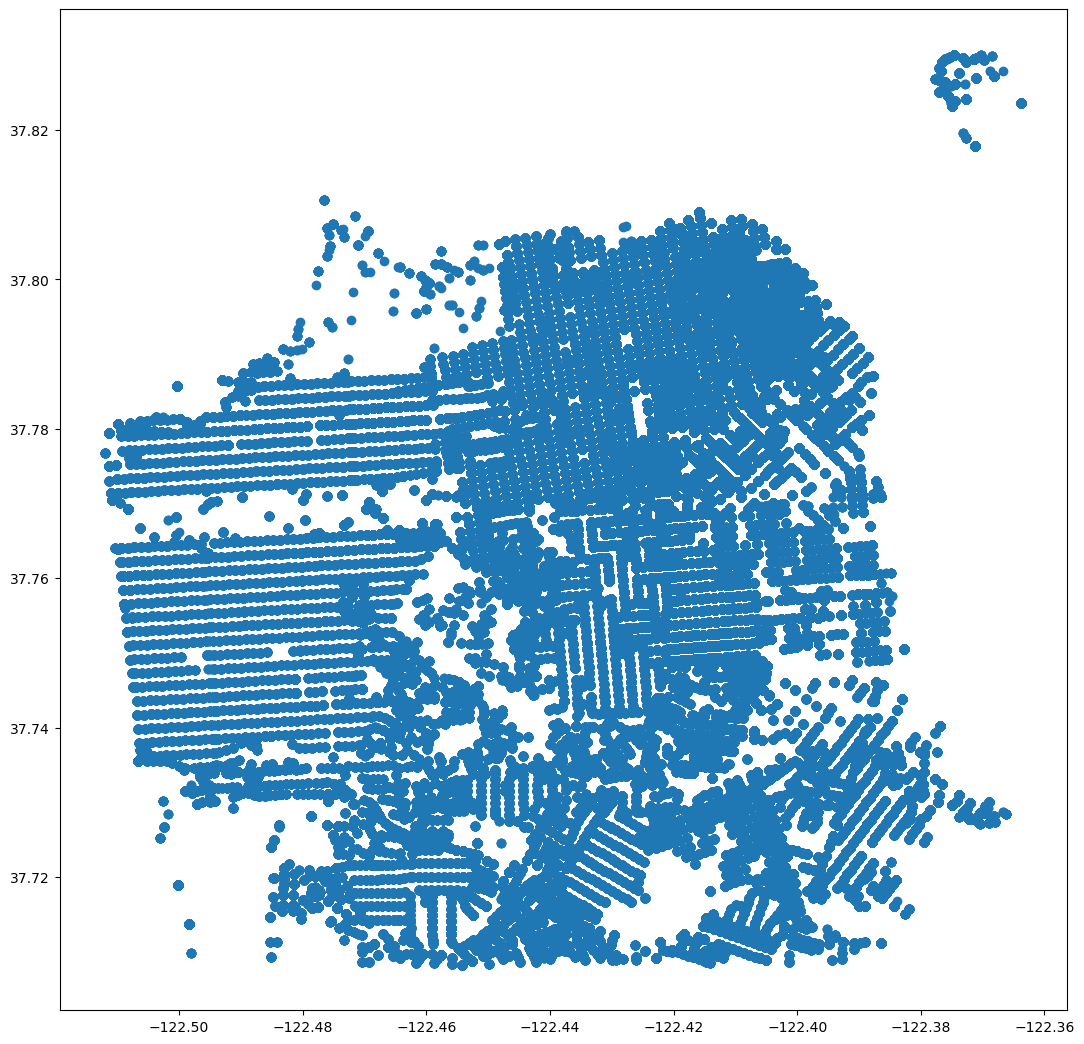

In [ ]:
plt.figure(figsize=(13,13))
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

In [ ]:
!pip install shapely
!pip install geopandas
!pip install geodatasets

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

c:\Users\HASTECH\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


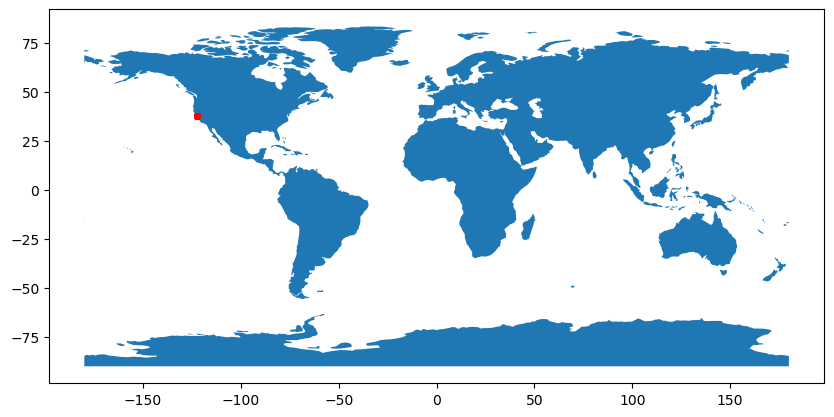

In [ ]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
# Create a map centered on the USA
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add points to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"Lat: {row['Latitude']}, Lon: {row['Longitude']}"
    ).add_to(m)

# Save the map as HTML
m.save("usa_locations_map.html")
print("Map saved as usa_locations_map.html")

Map saved as usa_locations_map.html


In [ ]:
#Lets use Decision tree to model our data and predict case resolutions

In [8]:
le= LabelEncoder()

In [9]:
df['Incident Year']= le.fit_transform(df['Incident Year'])
df['Incident Time']= le.fit_transform(df['Incident Time'])
df['Incident Date']= le.fit_transform(df['Incident Date'])
df['Incident Day of Week']= le.fit_transform(df['Incident Day of Week'])
df['Incident Category']= le.fit_transform(df['Incident Category'])
df['Police District']= le.fit_transform(df['Police District'])

In [10]:
X= df.drop('Resolution', axis= 1)
y= df['Resolution']

In [ ]:
#Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Train decision tree
#tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4)

In [13]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
# Predictions
y_pred = tree.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8560243875236998


c:\Users\HASTECH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HASTECH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                      precision    recall  f1-score   support

Cite or Arrest Adult       0.94      0.36      0.52     55071
   Exceptional Adult       0.00      0.00      0.00       782
      Open or Active       0.85      0.99      0.92    211806
           Unfounded       0.00      0.00      0.00      1331

            accuracy                           0.86    268990
           macro avg       0.45      0.34      0.36    268990
        weighted avg       0.86      0.86      0.83    268990



c:\Users\HASTECH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


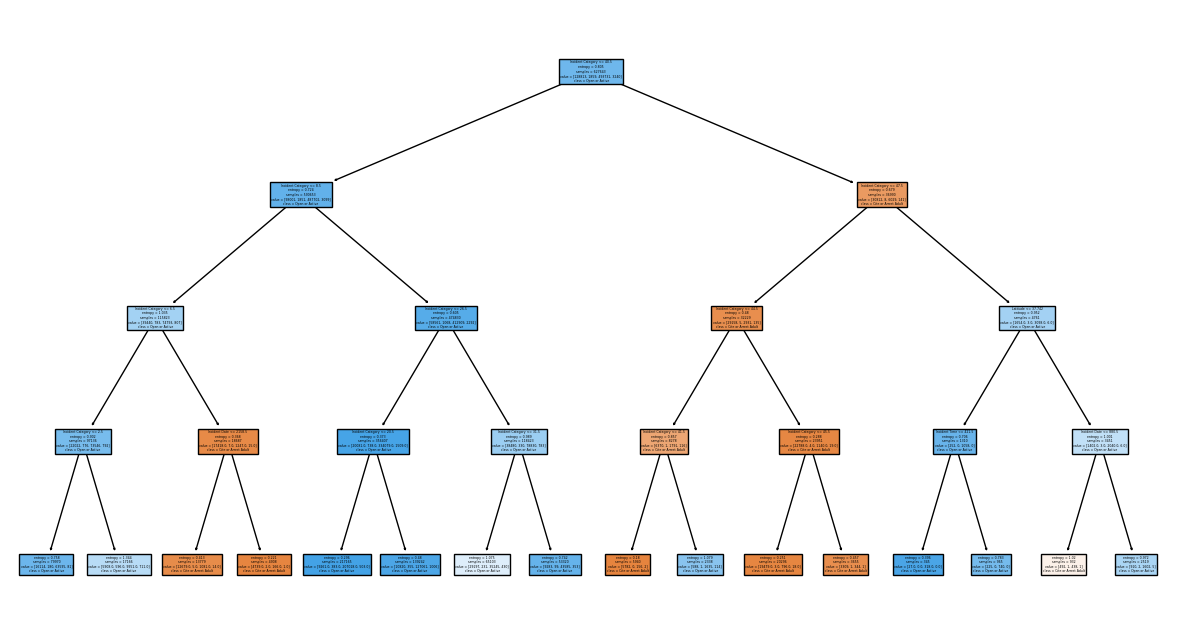

In [17]:
# Visualize tree
plt.figure(figsize=(15,8))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()